In [1]:
from matplotlib import pyplot
from os import listdir
from numpy.random import * 
import os
import numpy as np
import random
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam, Adadelta, SGD
from PIL import Image
from IPython.display import display

Using TensorFlow backend.


In [6]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

Found 2986 images belonging to 2 classes.
Found 1014 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 24s 512ms/step - loss: 0.9994 - acc: 0.9167 - val_loss: 0.6713 - val_acc: 0.9497
Epoch 2/10
47/47 [==============================] - 19s 407ms/step - loss: 0.5576 - acc: 0.9561 - val_loss: 0.6761 - val_acc: 0.9517
Epoch 3/10
47/47 [==============================] - 19s 410ms/step - loss: 0.4608 - acc: 0.9639 - val_loss: 0.5665 - val_acc: 0.9566
Epoch 4/10
47/47 [==============================] - 19s 406ms/step - loss: 0.4342 - acc: 0.9667 - val_loss: 0.6225 - val_acc: 0.9497
Epoch 5/10
47/47 [==============================] - 19s 406ms/step - loss: 0.3588 - acc: 0.9747 - val_loss: 0.6036 - val_acc: 0.9546
Epoch 6/10
47/47 [==============================] - 19s 407ms/step - loss: 0.2571 - acc: 0.9794 - val_loss: 0.4013 - val_acc: 0.9675
Epoch 7/10
47/47 [==============================] - 19s 409ms/step - loss: 0.1763 - acc: 0.9867 - val_loss: 0.4257 - v

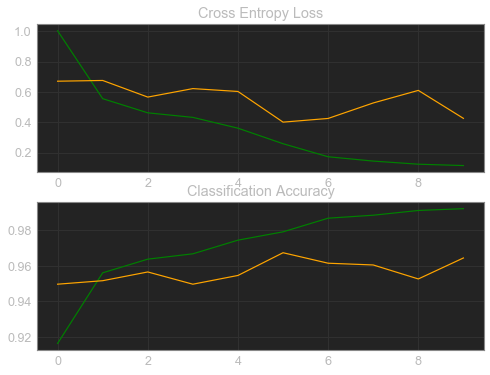

In [11]:
# baseline model for the dogs vs cats dataset
import sys
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    
	fig = plt.figure(figsize=(8,6))
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='green', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['acc'], color='green', label='train')
	pyplot.plot(history.history['val_acc'], color='orange', label='test')
	# save plot to file
	#filename = sys.argv[0].split('/')[-1]    
	plt.show()
	#fig.savefig('1block_CNN.png')
	fig.savefig('3block_TRA_CNN.png', bbox_inches='tight', dpi=300)
	#pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [6]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
# create directories
dataset_home = 'finalize_dogs_vs_cats/'
# create label subdirectories
labeldirs = ['cats/','dogs/']
for labldir in labeldirs:
	newdir = dataset_home + labldir
	makedirs(newdir, exist_ok=True)
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	if file.startswith('dog'):
		dst = dataset_home + 'dogs/'  + file
		copyfile(src, dst)
	elif file.startswith('cat'):
		dst = dataset_home + 'cats/'  + file
		copyfile(src, dst)

In [12]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adadelta
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	#opt = Adadelta()
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('finalize_dogs_vs_cats/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
	# save model
	model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Found 4000 images belonging to 2 classes.
Epoch 1/10
63/63 [==============================] - 22s 347ms/step - loss: 0.9945 - acc: 0.9102
Epoch 2/10
63/63 [==============================] - 19s 302ms/step - loss: 0.1116 - acc: 0.9737
Epoch 3/10
63/63 [==============================] - 19s 304ms/step - loss: 0.0223 - acc: 0.9938
Epoch 4/10
63/63 [==============================] - 19s 304ms/step - loss: 0.0047 - acc: 0.9993
Epoch 5/10
63/63 [==============================] - 19s 306ms/step - loss: 0.0021 - acc: 0.9998
Epoch 6/10
63/63 [==============================] - 19s 303ms/step - loss: 7.5891e-04 - acc: 1.0000
Epoch 7/10
63/63 [==============================] - 19s 304ms/step - loss: 5.6700e-04 - acc: 1.0000
Epoch 8/10
63/63 [==============================] - 19s 304ms/step - loss: 4.3915e-04 - acc: 1.0000
Epoch 9/10
63/63 [==============================] - 19s 304ms/step - loss: 3.6734e-04 - acc: 1.0000
Epoch 10/10
63/63 [==============================] - 19s 305ms/step - loss: 3.

In [3]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

# load an image and predict the class
def run_example():
	# load the image
	img = load_image('test/003.jpg')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])

# entry point, run the example
run_example()

[1.]


In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

folder = 'test/'
photos, labels, = list(), list()
model = load_model('final_model.h5')

def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img


def predict_dogncat(folder):
    for file in listdir(folder):
    
        photo = load_image('test/'+ str(file))
        result = model.predict(photo)
        for label in result[0]:
            labels.append(label)
            
        photos.append(file)
        
predict_dogncat(folder)

In [17]:
id_list = list()
for name in photos:
    id_list.append(name.replace('.jpg',''))

In [18]:
import pandas as pd

pd_id = pd.DataFrame(id_list, columns=['ID'])
pd_labels = pd.DataFrame(labels, columns=['Predicted'])

result = pd.concat([pd_id, pd_labels], axis=1, sort=False)

In [19]:
result.to_csv('final!.csv')